In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Load the dataset from given path
file_path = r"E:\Analytics club\ENB2012_data.csv"
df = pd.read_csv(file_path)

In [2]:
# Step 3: View first few rows of dataset

print("First 5 Rows of the Dataset:")
print(df.head())
print("\nDataset shape:")
print(df.shape)

First 5 Rows of the Dataset:
     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28

Dataset shape:
(768, 10)


In [3]:
# Step 4: Check column names
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [6]:
# Step 5: Rename columns for readability (optional)
df.columns = [
    "Relative_Compactness",
    "Surface_Area",
    "Wall_Area",
    "Roof_Area",
    "Overall_Height",
    "Orientation",
    "Glazing_Area",
    "Glazing_Area_Distribution",
    "Heating_Load",
    "Cooling_Load"
]

In [7]:
# Step 6: Check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [8]:
# Step 7: Check for missing values
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [10]:
# Step 8: Statistical summary of dataset
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [11]:
#Step 9: Handle missing values if any and replace with median
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

In [14]:
# Step 10: Check unique values (important for categorical-like features)
df["Orientation"].value_counts()
df["Glazing_Area_Distribution"].value_counts()

Glazing_Area_Distribution
1    144
2    144
4    144
3    144
5    144
0     48
Name: count, dtype: int64


Feature Distributions:


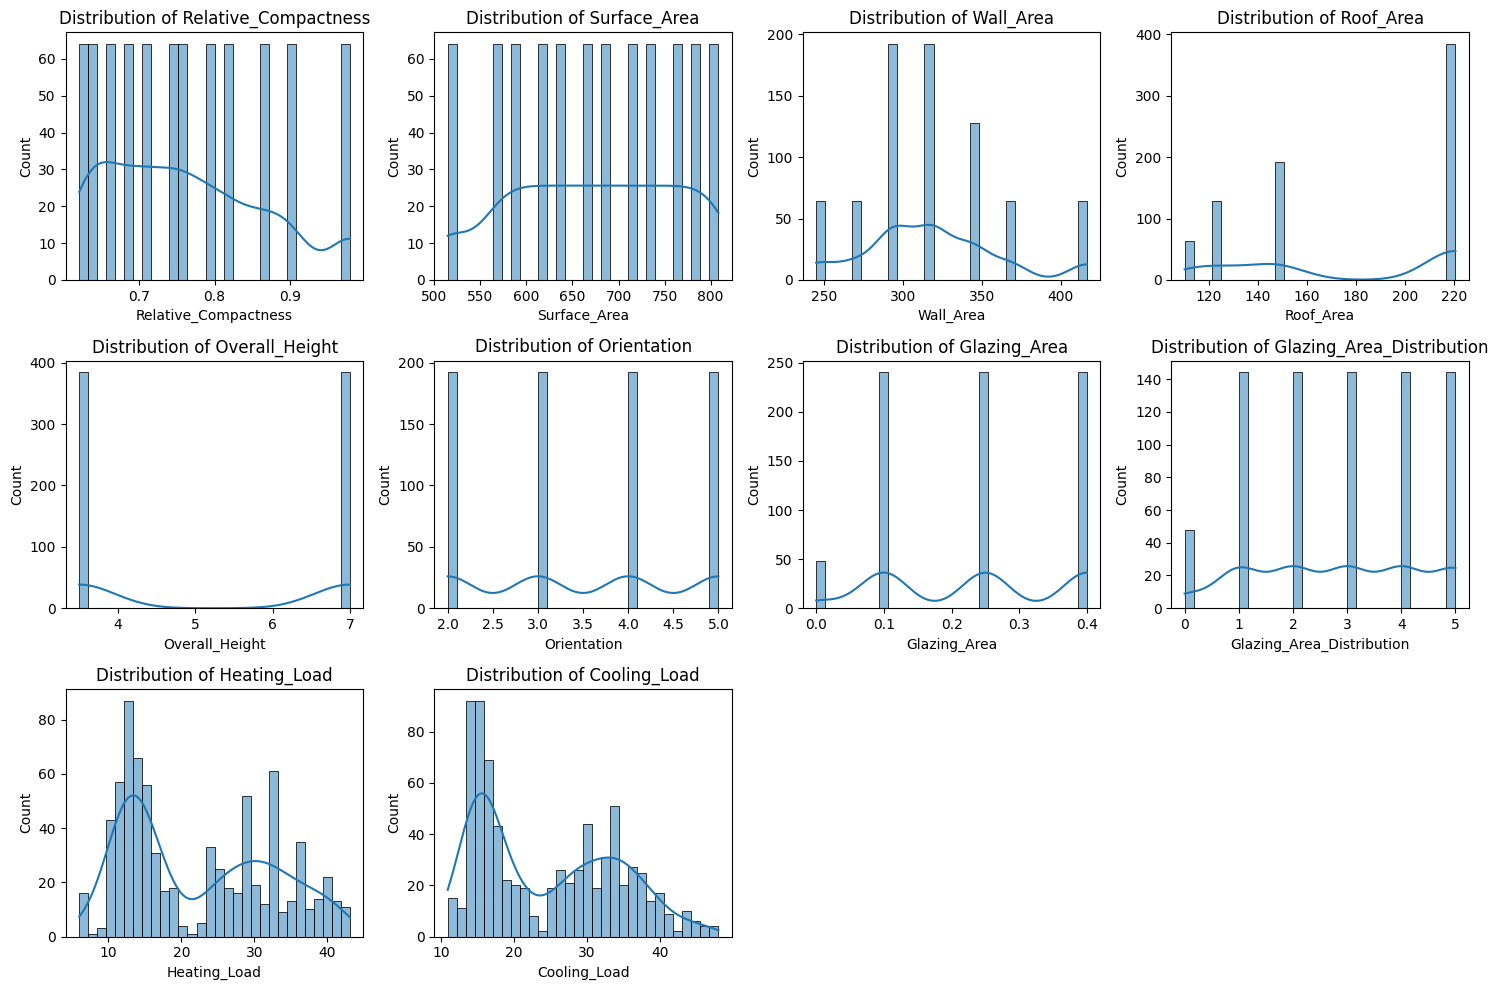

In [19]:
# Step 11: Distribution of target variables
print("\nFeature Distributions:")
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

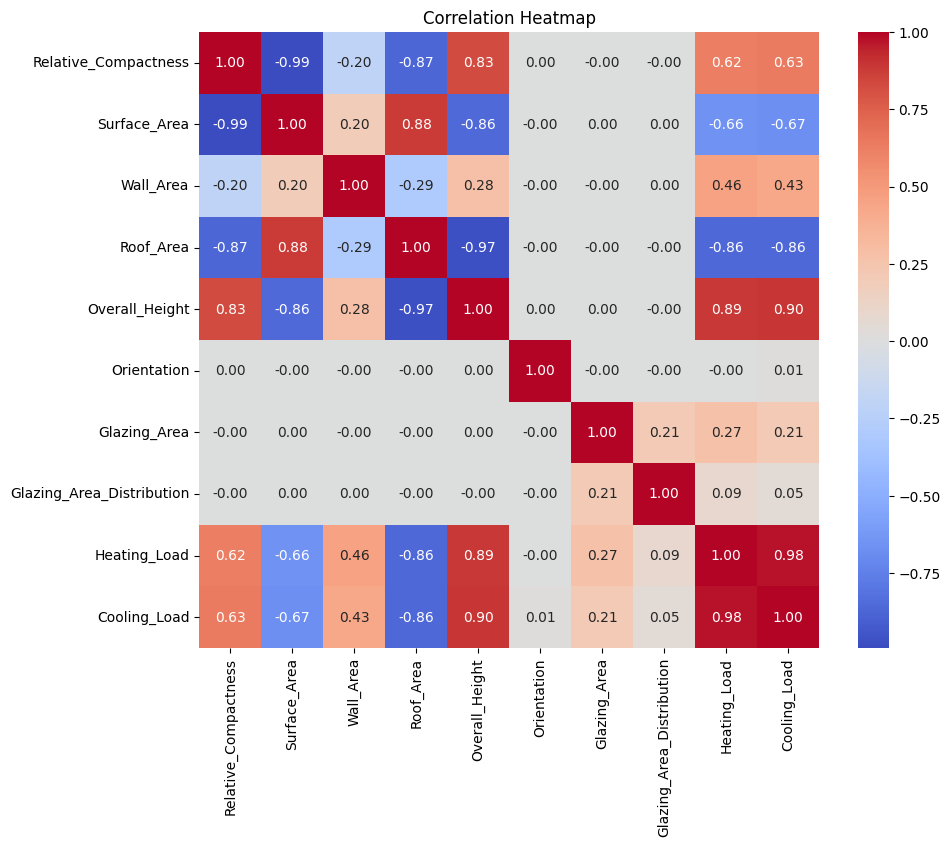

In [20]:
# Step 12: Correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

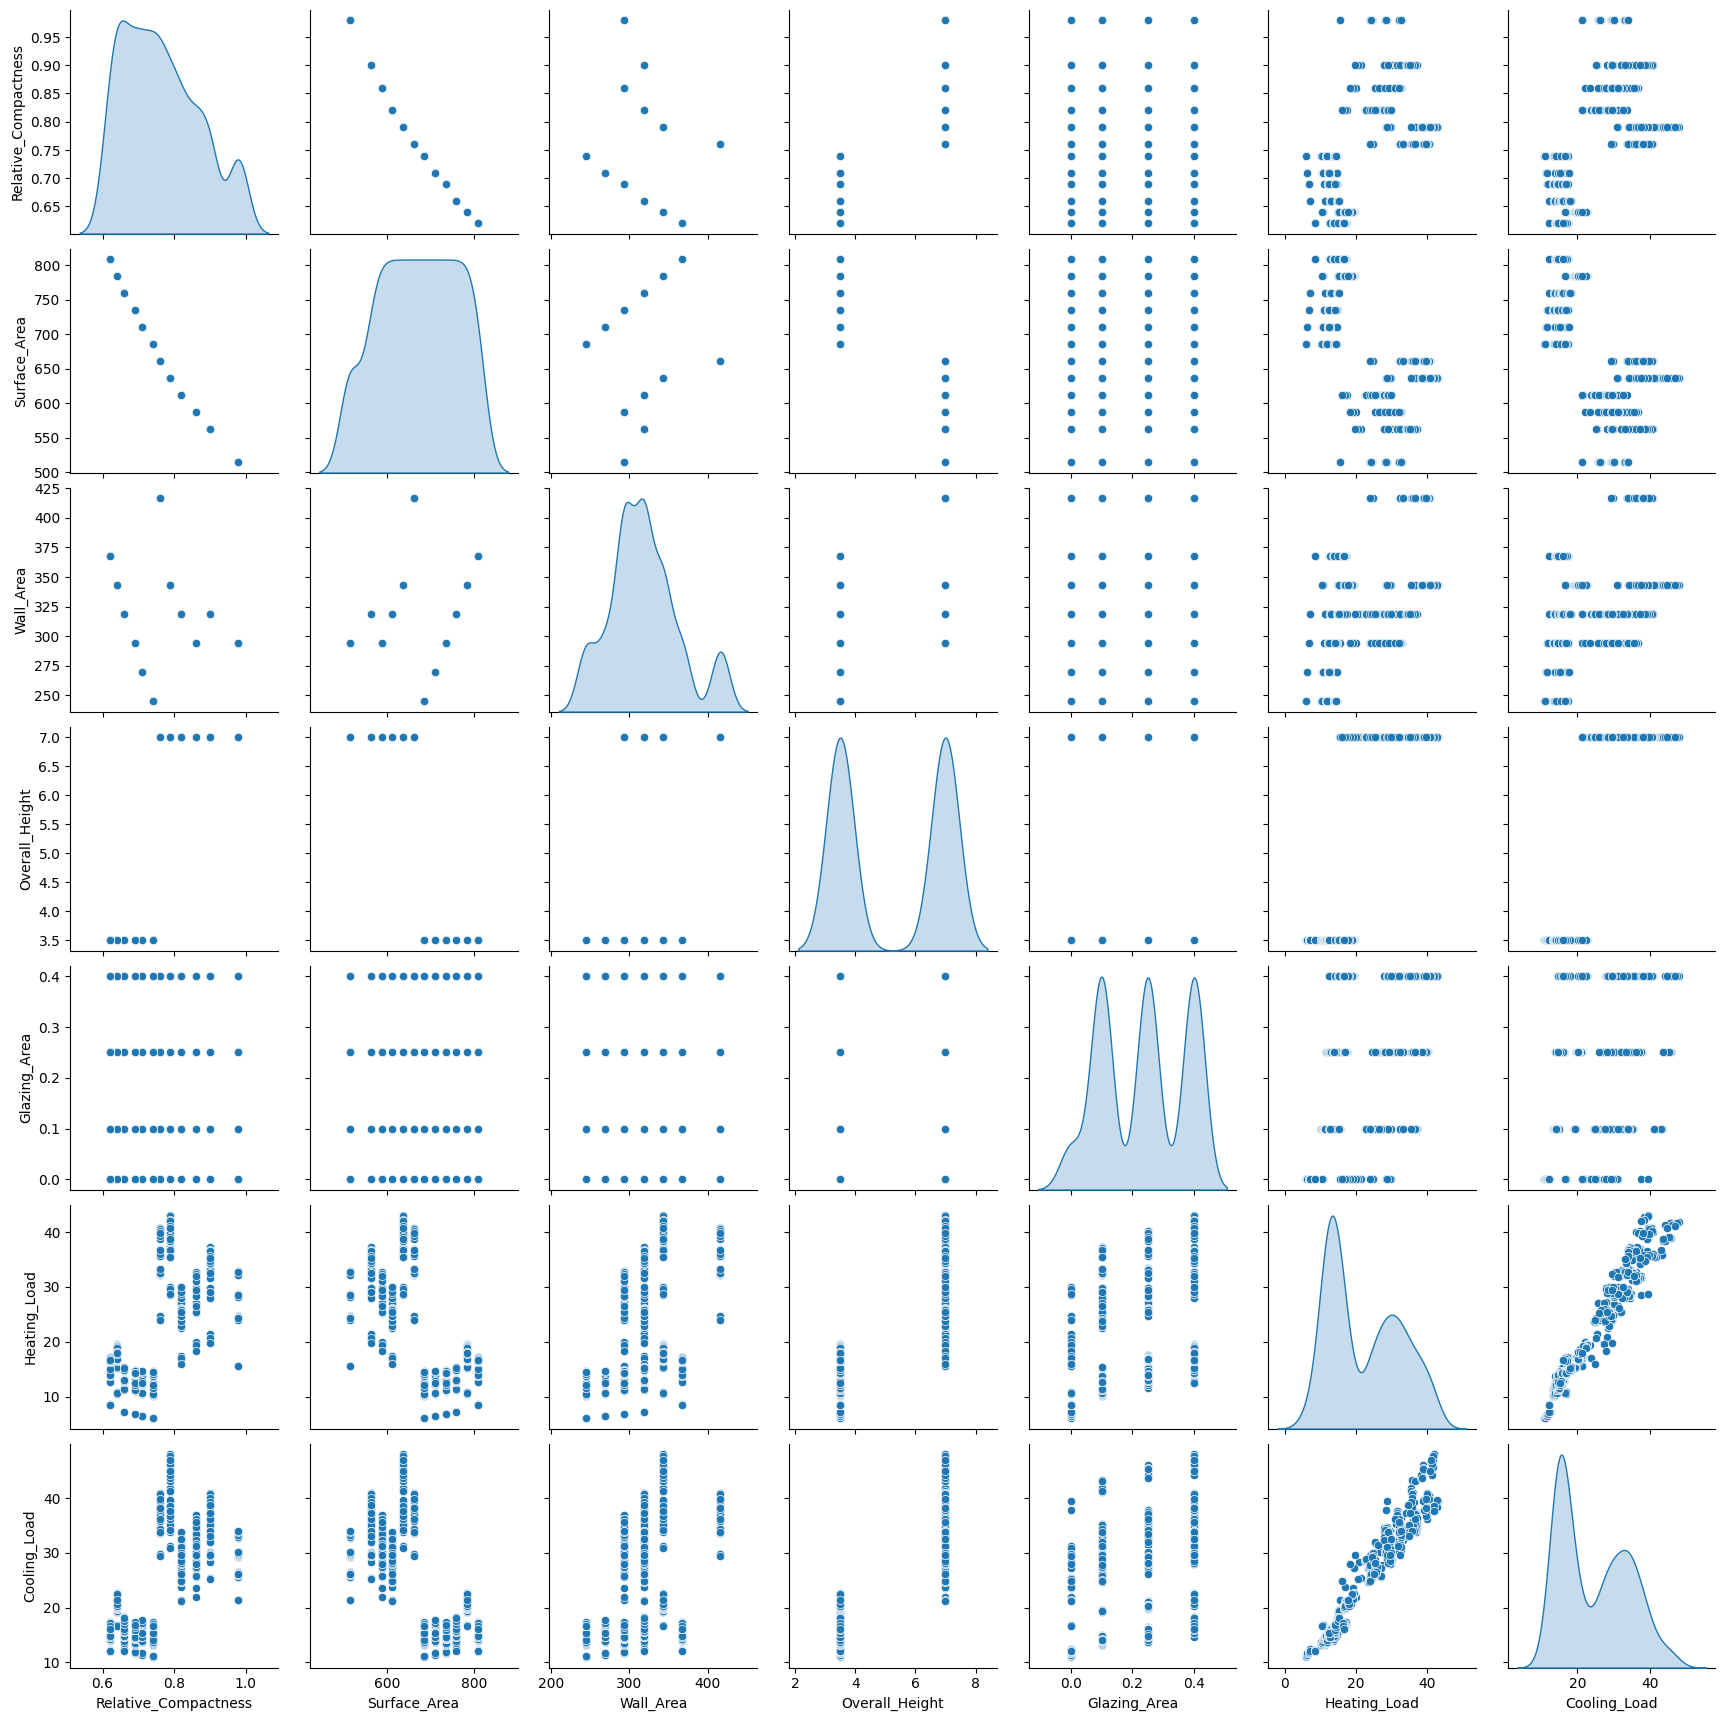

In [21]:
# Step 13: Pairplot (relationships overview)
sns.pairplot(
    df,
    vars=["Relative_Compactness", "Surface_Area", "Wall_Area",
          "Overall_Height", "Glazing_Area", "Heating_Load", "Cooling_Load"],
    diag_kind="kde"
)
plt.show()

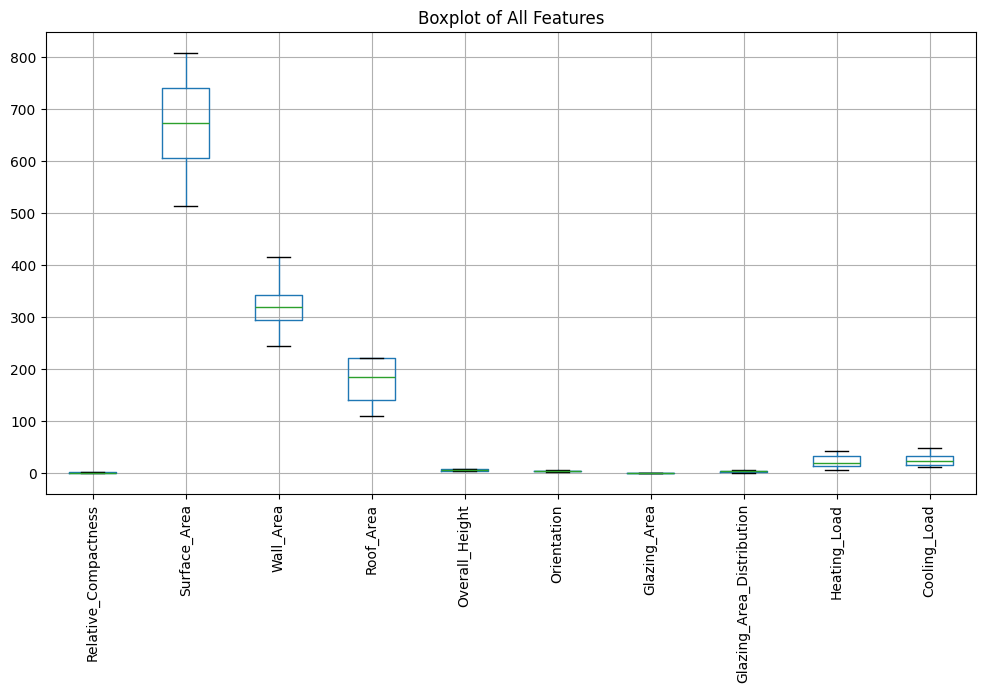

In [22]:
# Step 14: Boxplots to detect outliers
plt.figure(figsize=(12,6))
df.boxplot(rot=90)
plt.title("Boxplot of All Features")
plt.show()

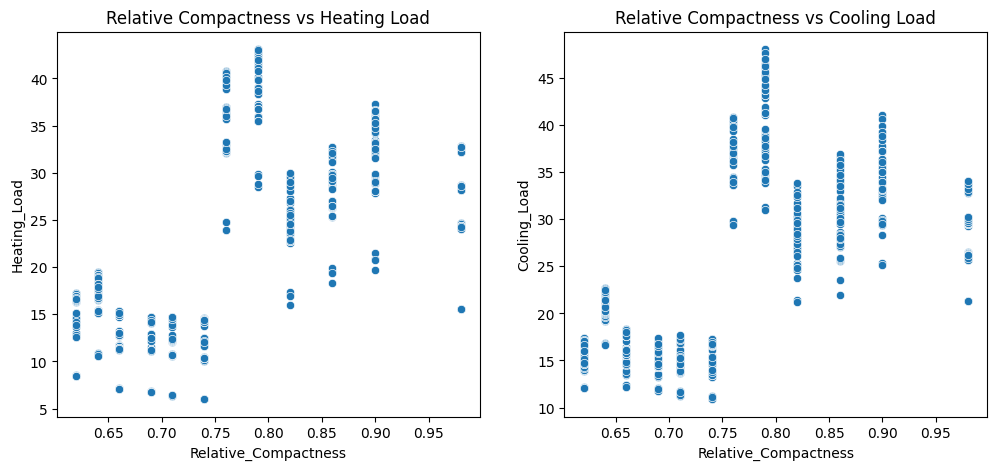

In [23]:
# Step 15: Relationship between inputs and outputs

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x="Relative_Compactness", y="Heating_Load", data=df)
plt.title("Relative Compactness vs Heating Load")

plt.subplot(1,2,2)
sns.scatterplot(x="Relative_Compactness", y="Cooling_Load", data=df)
plt.title("Relative Compactness vs Cooling Load")

plt.show()